# Question 2 - reading in the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
de_novo = pd.read_csv("aau1043_dnm.tsv")
age = pd.read_csv("aau1043_parental_age.tsv")

de_novo

,Chr,Pos,Ref,Alt,Proband_id,Phase_combined,Crossover,Sanger
0,chr1,241097646,C,T,99379,father,paternal_crossover,confirmed
1,chr10,29202943,A,G,8147,father,maternal_crossover,PCR failed
2,chr11,129441657,C,T,5410,mother,maternal_crossover,confirmed
3,chr13,96867147,A,G,46025,father,paternal_crossover,confirmed
4,chr17,50609998,C,T,144769,mother,maternal_crossover,confirmed
...,...,...,...,...,...,...,...,...
26426,chr9,137374330,C,T,54383,father,NaN,NaN
26427,chr9,137396508,C,T,39729,father,NaN,NaN
26428,chr9,137633973,C,A,17904,mother,NaN,NaN
26429,chr9,137889777,G,A,80108,father,NaN,NaN


# Question 3 - counting denovo mutations

In [14]:
total = de_novo["Proband_id"].value_counts().rename_axis('Proband_id').reset_index(name='total_dnm')
total

,Proband_id,total_dnm
0,91410,122
1,114094,121
2,111288,115
3,8147,114
4,88246,113
...,...,...
391,121087,37
392,62630,34
393,76504,34
394,37789,34


In [15]:
pat_dnm = de_novo["Proband_id"][de_novo["Phase_combined"] == 'father'].value_counts().rename_axis('Proband_id').reset_index(name='pat_dnm')
pat_dnm


,Proband_id,pat_dnm
0,91410,111
1,114094,98
2,111288,93
3,99984,91
4,64166,88
...,...,...
391,76504,27
392,1097,26
393,13990,25
394,36430,25


In [17]:
mat_dnm = de_novo["Proband_id"][de_novo["Phase_combined"] == 'mother'].value_counts().rename_axis('Proband_id').reset_index(name='mat_dnm')
mat_dnm

,Proband_id,mat_dnm
0,112917,32
1,13191,31
2,101332,30
3,142988,29
4,14991,28
...,...,...
391,93086,4
392,130614,3
393,37789,3
394,113829,3


In [18]:
new_obs = pat_dnm.merge(mat_dnm.merge(total, on = "Proband_id"), on = "Proband_id")

new_obs

,Proband_id,pat_dnm,mat_dnm,total_dnm
0,91410,111,10,122
1,114094,98,22,121
2,111288,93,21,115
3,99984,91,12,103
4,64166,88,16,105
...,...,...,...,...
391,76504,27,5,34
392,1097,26,12,39
393,13990,25,7,33
394,36430,25,16,42


# Question 4 merging age and dnm counts

In [19]:
dnm_age = new_obs.merge(age, on = "Proband_id")
dnm_age

,Proband_id,pat_dnm,mat_dnm,total_dnm,Father_age,Mother_age
0,91410,111,10,122,51,34
1,114094,98,22,121,51,44
2,111288,93,21,115,53,44
3,99984,91,12,103,51,41
4,64166,88,16,105,41,40
...,...,...,...,...,...,...
391,76504,27,5,34,19,17
392,1097,26,12,39,19,19
393,13990,25,7,33,16,17
394,36430,25,16,42,35,26


# Question 5 - plotting dnm over age

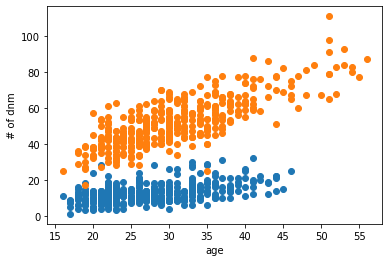

In [61]:
fig, ax = plt.subplots()

ax.scatter(dnm_age["Mother_age"], dnm_age["mat_dnm"])
ax.scatter(dnm_age["Father_age"], dnm_age["pat_dnm"])
ax.set_xlabel('age')
ax.set_ylabel('# of dnm')

plt.show()

# Question 6

In [28]:
model = smf.ols(formula = "mat_dnm ~ 1 + Mother_age", data = dnm_age)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                mat_dnm   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     116.0
Date:                Fri, 04 Sep 2020   Prob (F-statistic):           6.88e-24
Time:                        14:12:37   Log-Likelihood:                -1158.1
No. Observations:                 396   AIC:                             2320.
Df Residuals:                     394   BIC:                             2328.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5040      0.981      2.553      0.011       0.576       4.432
Mother_age     0.3776      0.035     10.772      0.000       0.309       0.446
==============================================================================
Omnibus:                       51.143   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.501
Skew:                           0.845   Prob(JB):                     4.03e-17
Kurtosis:                       4.310   Cond. No.                         121.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- P-value is significant
- Size of relationship: 0.3776

# Question 7

In [29]:
model = smf.ols(formula = "pat_dnm ~ 1 + Father_age", data = dnm_age)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                pat_dnm   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     639.6
Date:                Fri, 04 Sep 2020   Prob (F-statistic):           1.55e-84
Time:                        14:15:49   Log-Likelihood:                -1406.6
No. Observations:                 396   AIC:                             2817.
Df Residuals:                     394   BIC:                             2825.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.3263      1.702      6.066      0.000       6.979      13.673
Father_age     1.3538      0.054     25.291      0.000       1.249       1.459
==============================================================================
Omnibus:                        7.687   Durbin-Watson:                   1.183
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                8.185
Skew:                           0.256   Prob(JB):                       0.0167
Kurtosis:                       3.483   Cond. No.                         127.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- P-value is significant
- Size of relationship: 1.3538

# Question 8 - Histogram of dnm in maternal vs paternal

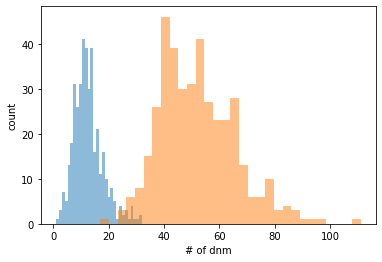

In [64]:

fig, ax = plt.subplots()
ax.hist(dnm_age["mat_dnm"], bins = 30, alpha = 0.5)
ax.hist(dnm_age["pat_dnm"], bins = 30, alpha = 0.5)
ax.set_xlabel('# of dnm')
ax.set_ylabel('count')

plt.show()

# Question 9

In [32]:
stats.ttest_ind(dnm_age["mat_dnm"], dnm_age["pat_dnm"])


Ttest_indResult(statistic=-53.403565287269245, pvalue=2.1986031793078793e-264)

# Question 10 - refit data to Poisson model

In [52]:
m_model = smf.poisson(formula = "mat_dnm ~ 1 + Mother_age", data = dnm_age)
results = m_model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 2.927974
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                mat_dnm   No. Observations:                  396
Model:                        Poisson   Df Residuals:                      394
Method:                           MLE   Df Model:                            1
Date:                Fri, 04 Sep 2020   Pseudo R-squ.:                 0.07164
Time:                        15:08:51   Log-Likelihood:                -1159.5
converged:                       True   LL-Null:                       -1248.9
Covariance Type:            nonrobust   LLR p-value:                 8.241e-41
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7671      0.060     29.235      0.000       1.649       1.886
Mother_age     0.0281      0.002     13.582      0.000       0.024       0.032
==============================================================================
"""

In [56]:
p_model = smf.poisson(formula = "pat_dnm ~ 1 + Father_age", data = dnm_age)
p_results = p_model.fit()
p_results.summary()

Optimization terminated successfully.
         Current function value: 3.578620
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                pat_dnm   No. Observations:                  396
Model:                        Poisson   Df Residuals:                      394
Method:                           MLE   Df Model:                            1
Date:                Fri, 04 Sep 2020   Pseudo R-squ.:                  0.2277
Time:                        15:11:26   Log-Likelihood:                -1417.1
converged:                       True   LL-Null:                       -1834.9
Covariance Type:            nonrobust   LLR p-value:                1.004e-183
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.1903      0.027    116.856      0.000       3.137       3.244
Father_age     0.0241      0.001     29.608      0.000       0.023       0.026
==============================================================================
"""

# Question 11 - making prediction

In [57]:
new_obs = pd.DataFrame({"Proband_id" : "x", "Father_age" : [50.5]}, index = ["a"])

p_results.predict(new_obs)


a    82.031316
dtype: float64